Решить задачу Коши для системы:  
y_1'=x/sqrt(1+x^2+y_2^2), y_2'=y_1/sqrt(1+x^2+y_1^2)
на отрезке [-1,1]  с шагом h=0.1;  
y_1 (-1)=0.2, y_2 (-1)=0.  
По таблице значений функции y_1 (x) построить многочлен второй степени наилучшего приближения по критерию наименьших квадратов


In [1]:
import numpy as np
import scipy.sparse
import scipy.linalg
import matplotlib.pyplot as plt


def norma_matr(arr):
    sums = [sum(abs(arr[i])) for i in range(len(arr))]
    return max(sums)
    
def norma_vect(v):
    return sum([abs(el) for el in v])


def Seidel(A, b):
    n = len(A)
    B = np.zeros((n, n))
    d = np.zeros(n)
    for i in range(n):
        for j in range(n):
            if i == j:
                B[i][i] = 0
            else:    
                 B[i][j] = -A[i][j] / A[i][i]
        d[i] = b[i]/A[i][i]
    
    eps = 0.000001
    x_new = np.copy(d)
    for i in range(len(x_new)):
        x_new[i] = np.dot(B[i], x_new) + d[i]
    x = np.copy(d)

    while norma_vect(np.dot(A, x_new) - b) > eps:
        x = np.copy(x_new)
        for i in range(len(x_new)):
            x_new[i] = np.dot(B[i], x_new) + d[i]
        print('x_new = ', x_new)
    return x_new


def Runge_Kutta(arr_x, h):
    arr_y_1 = np.zeros(len(arr_x))
    arr_y_1[0] = 0.2
    arr_y_2 = np.zeros(len(arr_x))
    arr_y_2[0] = 0
    for i in range(1, len(arr_x)):
        k1 = f_1(arr_x[i-1], arr_y_2[i-1])
        q1 = f_2(arr_x[i-1], arr_y_1[i-1])
        k2 = f_1(arr_x[i-1] + h/2, arr_y_2[i-1] + k1 * h / 2)
        q2 = f_2(arr_x[i-1] + h/2, arr_y_1[i-1] + q1 * h / 2)
        k3 = f_1(arr_x[i-1] + h/2, arr_y_2[i-1] + k2 * h / 2)
        q3 = f_2(arr_x[i-1] + h/2, arr_y_1[i-1] + q2 * h / 2)
        k4 = f_1(arr_x[i-1] + h, arr_y_2[i-1] + k3 * h)
        q4 = f_2(arr_x[i-1] + h, arr_y_1[i-1] + q3 * h)
        
        arr_y_1[i] = arr_y_1[i-1] + h*(k1 + 2*k2 + 2*k3 + k4)/6
        arr_y_2[i] = arr_y_2[i-1] + h*(q1 + 2*q2 + 2*q3 + q4)/6
          
    return (arr_y_1, arr_y_2)


f_1 = lambda x, y_2: x/np.sqrt(1 + x*x + y_2*y_2)
f_2 = lambda x, y_1: y_1/np.sqrt(1 + x*x + y_1*y_1)

h = 0.001

xx = np.arange(-1, 1+h, h)

yy_1, yy_2 = Runge_Kutta(xx, h)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xx, yy_1, 'r', xx, yy_2, 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(("y1", "y2"))

In [2]:
M = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        M[i][j] = np.sum(xx ** (i+j))
Y = np.array([np.sum(yy_1), np.sum(yy_1 * xx), np.sum(yy_1 * xx**2)])
print(np.linalg.solve(M, Y))
#coef = np.linalg.solve(M, Y)
coef = Seidel(M, Y)

[-0.20721641 -0.00125017  0.42078148]
x_new =  [-0.14326069 -0.00125017  0.31429506]
x_new =  [-0.17168544 -0.00125017  0.36162234]
x_new =  [-0.18747698 -0.00125017  0.38791528]
x_new =  [-0.19625006 -0.00125017  0.40252248]
x_new =  [-0.20112399 -0.00125017  0.41063759]
x_new =  [-0.20383173 -0.00125017  0.41514598]
x_new =  [-0.20533603 -0.00125017  0.41765065]
x_new =  [-0.20617176 -0.00125017  0.41904213]
x_new =  [-0.20663605 -0.00125017  0.41981518]
x_new =  [-0.20689399 -0.00125017  0.42024465]
x_new =  [-0.20703729 -0.00125017  0.42048324]
x_new =  [-0.2071169  -0.00125017  0.42061579]
x_new =  [-0.20716113 -0.00125017  0.42068943]
x_new =  [-0.2071857  -0.00125017  0.42073034]
x_new =  [-0.20719935 -0.00125017  0.42075307]
x_new =  [-0.20720693 -0.00125017  0.4207657 ]
x_new =  [-0.20721115 -0.00125017  0.42077272]
x_new =  [-0.20721349 -0.00125017  0.42077661]
x_new =  [-0.20721479 -0.00125017  0.42077878]
x_new =  [-0.20721551 -0.00125017  0.42077998]
x_new =  [-0.20721591 

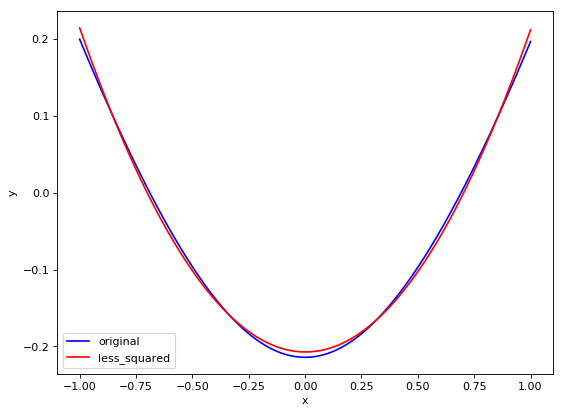

In [3]:
yy_1_ls = coef[0] + coef[1]*xx + coef[2]*xx**2
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xx, yy_1, 'b', xx, yy_1_ls, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(("original", "less_squared"))